In [1]:
# Question 1: Doing imports and reading in .csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:\\Users\\Khizar\\Desktop\\Semester - Spring 2021\\5 - Machine Learning 4375\\CSV')
path = os.getcwd()
path

# Reading in file
bike = pd.read_csv('bikeshare.csv')

In [2]:
# Question 2: Getting head of bike data frame
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Question 3:
# What are we trying to predict? We are using what we learned previously in this class and taking a linear and 
# polynomial regression to predict the count of bike rentals based on different factors provided.

<AxesSubplot:xlabel='temp', ylabel='count'>

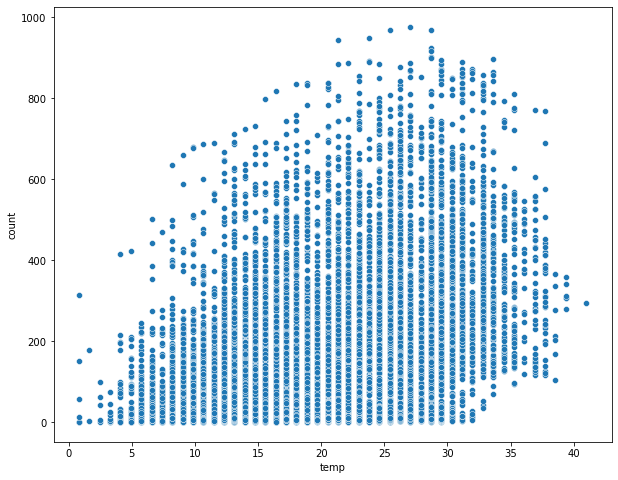

In [4]:
# Question 4: Count VS Temp Scatterplot
fig,(ax1) = plt.subplots(1,figsize=(10,8))
sns.scatterplot(x='temp', y='count', data=bike, ax=ax1)

<AxesSubplot:xlabel='datetime', ylabel='count'>

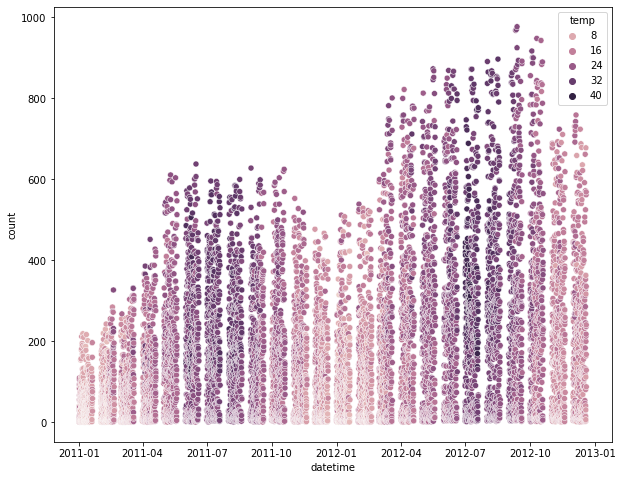

In [5]:
# Question 5: 

# converting date time column from object to datetime
bike['datetime'] = pd.to_datetime(bike['datetime'], format='%Y-%m-%d %H:%M:%S')

# scatter plotting count vs datetime and coloring based on temperature
fig,(ax1) = plt.subplots(1,figsize=(10,8))
sns.scatterplot(x='datetime', y='count', data=bike, hue='temp', ax=ax1)

In [6]:
# Question 6: Count and Temp Correlation
bike['temp'].corr(bike['count'])

0.39445364496724933

<AxesSubplot:xlabel='season', ylabel='count'>

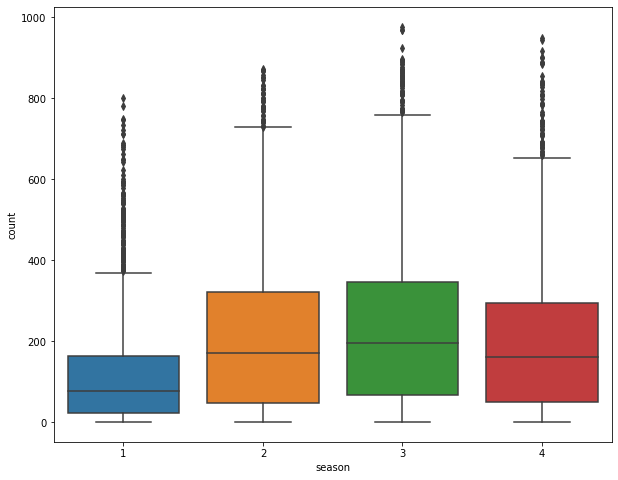

In [7]:
# Question 7: Season and Count Boxplot
fig,(ax1) = plt.subplots(1,figsize=(10,8))
sns.boxplot(x='season', y='count', data=bike, ax=ax1)

In [8]:
# Question 8: creating a column named hour
bike['hour'] = pd.to_datetime(bike['datetime']).dt.hour
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [9]:
# Question 9: Predicting Count based on Temp

# temp is x
X = bike['temp']

# count is y
y = bike['count']

# linear regression:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression

temp_model = LinearRegression()

# reshaping values 1D array
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Model fitting
temp_model.fit(X_train, y_train)
test_pred = temp_model.predict(X_test)
test_pred
y_test

# setting values
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, test_pred)
MSE = mean_squared_error(y_test, test_pred)
RMSE = np.sqrt(MSE)

# Question 10: Printing Summary
print(MAE)
print(MSE)
print(RMSE)

125.96856306700478
26839.25420404189
163.82690317540002


In [10]:
# Question 11: getting estimate for 25 temp.
print (temp_model .intercept_)
print (temp_model.coef_)
temp_model.intercept_ + temp_model.coef_*25
temp_model.predict([[25]])

[6.6530476]
[[9.22671047]]


array([[237.32080926]])

In [11]:
# Question 12 
bike['hour'] = pd.to_numeric(bike['hour'])

In [12]:
# Question 13: Doing it for all factors: 

factors = ["season", "holiday", "workingday", "weather", "humidity", "windspeed", "hour"]

for x in factors:

    #printing factor
    print(x)

    # factor is x
    X = bike[x]

    # count is y
    y = bike['count']

    # linear regression:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

    from sklearn.linear_model import LinearRegression
    estimator = LinearRegression()

    # reshaping values 1D array
    X_train= X_train.values.reshape(-1, 1)
    y_train= y_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)

    # Fitting Estimator
    estimator.fit(X_train, y_train)
    test_pred = estimator.predict(X_test)
    test_pred
    y_test

    # setting values
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    MAE = mean_absolute_error(y_test, test_pred)
    MSE = mean_squared_error(y_test, test_pred)
    RMSE = np.sqrt(MSE)

    # Question 14: Printing Summary
    print(MAE) 
    print(MSE)
    print(RMSE) 
    print("\n")

season
138.46950840740587
30944.42250094251
175.9102683215011


holiday
141.73537731464867
31834.48571839132
178.4222119535326


workingday
141.91952296511803
31917.538946936926
178.65480387310308


weather
139.85991970059396
31366.947449213658
177.10716374334962


humidity
131.6320794295039
28777.11941450514
169.6382015187179


windspeed
140.9680618445035
31470.879937063048
177.40033804100557


hour
124.07233932671107
26670.558948615013
163.3112333815865




In [13]:
# Question 15: The model performed very well on a Linear Regression. Most of the values and their correlation was similar. 
# The values are understandable when looking at the graphs and using common knowledge.

In [14]:
# Tried Polynomial Regression.